In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

from api_keys import weather_api_key

from citipy import citipy

output_data_file = 'output_data/cities.csv'

lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
weather_api_key

'c8554ba1fbb753fb6092c34c874f029b'

In [3]:
lat_lngs = []
cities = []

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)
        
len(cities)

683

In [31]:
cities['natal'].index

TypeError: list indices must be integers or slices, not str

In [28]:
#list(lat_lngs)
base_url = f"http://api.openweathermap.org/data/2.5/weather"
base_url

'http://api.openweathermap.org/data/2.5/weather'

In [112]:
city_weather_list[0]

{'coord': {'lon': -35.21, 'lat': -5.79},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02d'}],
 'base': 'stations',
 'main': {'temp': 86.94,
  'feels_like': 88.18,
  'temp_min': 86,
  'temp_max': 87.8,
  'pressure': 1013,
  'humidity': 55},
 'visibility': 10000,
 'wind': {'speed': 10.29, 'deg': 110},
 'clouds': {'all': 20},
 'dt': 1592239662,
 'sys': {'type': 1,
  'id': 8417,
  'country': 'BR',
  'sunrise': 1592209671,
  'sunset': 1592252105},
 'timezone': -10800,
 'id': 3394023,
 'name': 'Natal',
 'cod': 200}

In [114]:
city_weather_list[0]['cod']

IndexError: list index out of range

In [116]:
city_weather_list = []
for city in cities:
    params = {'q': city, 'appid': weather_api_key, 'units': 'imperial'}
    response = requests.get(base_url, params=params).json()
    if response['cod'] == 200:
        print(f"Processing City {cities.index(city)+1} | {city}")
        city_weather_list.append(response)
    else:
        print(f"City not found. Skipping...")
    time.sleep(1.2)

Processing City 1 | natal
Processing City 2 | hilo
Processing City 3 | bluff
Processing City 4 | salalah
Processing City 5 | mataura
Processing City 6 | cape town
Processing City 7 | romilly-sur-seine
Processing City 8 | yar-sale
City not found. Skipping...
Processing City 10 | kajaani
Processing City 11 | albany
Processing City 12 | labuhan
Processing City 13 | mizdah
Processing City 14 | saskylakh
Processing City 15 | airai
Processing City 16 | huarmey
Processing City 17 | caravelas
Processing City 18 | kodiak
Processing City 19 | nagato
Processing City 20 | thompson
Processing City 21 | udachnyy
Processing City 22 | port moresby
Processing City 23 | mar del plata
Processing City 24 | buchanan
Processing City 25 | vardo
Processing City 26 | rikitea
Processing City 27 | kavaratti
Processing City 28 | sadon
Processing City 29 | pemberton
Processing City 30 | puerto ayora
Processing City 31 | mahebourg
Processing City 32 | anchorage
Processing City 33 | carnarvon
Processing City 34 | kh

In [119]:
city_weather_list[0]

{'coord': {'lon': -35.21, 'lat': -5.79},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'base': 'stations',
 'main': {'temp': 86.9,
  'feels_like': 89.92,
  'temp_min': 86,
  'temp_max': 87.8,
  'pressure': 1012,
  'humidity': 62},
 'visibility': 10000,
 'wind': {'speed': 10.29, 'deg': 150},
 'clouds': {'all': 40},
 'dt': 1592242354,
 'sys': {'type': 1,
  'id': 8452,
  'country': 'BR',
  'sunrise': 1592209671,
  'sunset': 1592252105},
 'timezone': -10800,
 'id': 3394023,
 'name': 'Natal',
 'cod': 200}

In [123]:
city = [city_weather_list[i]['name'] for i in range(len(city_weather_list))]
cloudiness = [city_weather_list[i]['clouds']['all'] for i in range(len(city_weather_list))]
country = [city_weather_list[i]['sys']['country'] for i in range(len(city_weather_list))]
date = [city_weather_list[i]['dt'] for i in range(len(city_weather_list))]
humidity = [city_weather_list[i]['main']['humidity'] for i in range(len(city_weather_list))]
lat = [city_weather_list[i]['coord']['lat'] for i in range(len(city_weather_list))]
lng = [city_weather_list[i]['coord']['lon'] for i in range(len(city_weather_list))]
max_temp = [city_weather_list[i]['main']['temp_max'] for i in range(len(city_weather_list))]
wind_speed = [city_weather_list[i]['wind']['speed'] for i in range(len(city_weather_list))]


In [124]:
weather_df = pd.DataFrame({'City': city,
                         'Cloudiness': cloudiness,
                         'Country': country,
                         'Date': date,
                         'Humidity': humidity,
                         'Lat': lat,
                         'Lng': lng,
                         'Max Temp': max_temp,
                         'Wind Speed': wind_speed})
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Natal,40,BR,1592242354,62,-5.79,-35.21,87.80,10.29
1,Hilo,1,US,1592242585,83,19.73,-155.09,72.00,3.36
2,Bluff,32,NZ,1592242586,90,-46.60,168.33,49.01,9.84
3,Salalah,40,OM,1592242343,94,17.02,54.09,84.20,6.93
4,Mataura,5,NZ,1592242589,90,-46.19,168.86,43.27,3.89


In [134]:
weather_df.to_csv(output_data_file)

In [128]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631 entries, 0 to 630
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        631 non-null    object 
 1   Cloudiness  631 non-null    int64  
 2   Country     631 non-null    object 
 3   Date        631 non-null    int64  
 4   Humidity    631 non-null    int64  
 5   Lat         631 non-null    float64
 6   Lng         631 non-null    float64
 7   Max Temp    631 non-null    float64
 8   Wind Speed  631 non-null    float64
dtypes: float64(4), int64(3), object(2)
memory usage: 44.5+ KB


In [126]:
weather_df.tail()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
626,Mileanca,28,RO,1592243554,67,48.08,26.70,75.00,3.02
627,Kualakapuas,8,ID,1592243555,97,-3.01,114.39,74.52,3.47
628,Burgeo,81,CA,1592243556,79,47.62,-57.62,55.71,9.46
629,Tarboro,90,US,1592243558,93,35.90,-77.54,64.40,8.05
630,Valparaíso,75,CL,1592243559,100,-33.04,-71.63,57.20,18.34


In [130]:
weather_df['Lng']

0      -35.21
1     -155.09
2      168.33
3       54.09
4      168.86
        ...  
626     26.70
627    114.39
628    -57.62
629    -77.54
630    -71.63
Name: Lng, Length: 631, dtype: float64

In [131]:
weather_df['Lat']

0      -5.79
1      19.73
2     -46.60
3      17.02
4     -46.19
       ...  
626    48.08
627    -3.01
628    47.62
629    35.90
630   -33.04
Name: Lat, Length: 631, dtype: float64

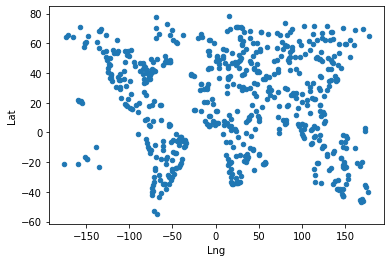

In [132]:
weather_df.plot.scatter(x='Lng', y='Lat')

In [100]:
city_weather_list[8]

{'cod': '404', 'message': 'city not found'}

In [90]:
country = [city_weather_list[i]['sys']['country'] for i in range(683)]
country

KeyError: 'sys'

In [76]:
city_weather_list[0]['sys']['country']

'BR'

In [97]:
country_list = []
try:
    for i in range(len(city_weather_list)):
        country_list.append(city_weather_list[i]['sys']['country'])
except KeyError:
    print(f"error at {i}")

error at 8


In [88]:
country_list

['BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',
 'BR',

In [79]:
city_weather_list[i]['sys']['country']

NameError: name 'i' is not defined

In [68]:
list(range(len(city_weather_list)))

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [81]:
city_weather_list[1]['clouds']['all']

75

In [50]:
weather_df = pd.DataFrame(city_weather_list)
weather_df.head()

,coord,weather,base,main,visibility,wind,clouds,dt,sys,timezone,id,name,cod
0,"{'lon': 27.73, 'lat': 64.23}","[{'id': 804, 'main': 'Clouds', 'description': ...",stations,"{'temp': 77, 'feels_like': 73.58, 'temp_min': ...",10000,"{'speed': 6.93, 'deg': 290}",{'all': 97},1592237488,"{'type': 1, 'id': 1344, 'country': 'FI', 'sunr...",10800,654899,Kajaani,200
1,"{'lon': 27.73, 'lat': 64.23}","[{'id': 804, 'main': 'Clouds', 'description': ...",stations,"{'temp': 77, 'feels_like': 73.58, 'temp_min': ...",10000,"{'speed': 6.93, 'deg': 290}",{'all': 97},1592237488,"{'type': 1, 'id': 1344, 'country': 'FI', 'sunr...",10800,654899,Kajaani,200
2,"{'lon': 27.73, 'lat': 64.23}","[{'id': 804, 'main': 'Clouds', 'description': ...",stations,"{'temp': 77, 'feels_like': 73.58, 'temp_min': ...",10000,"{'speed': 6.93, 'deg': 290}",{'all': 97},1592237488,"{'type': 1, 'id': 1344, 'country': 'FI', 'sunr...",10800,654899,Kajaani,200
3,"{'lon': 27.73, 'lat': 64.23}","[{'id': 804, 'main': 'Clouds', 'description': ...",stations,"{'temp': 77, 'feels_like': 73.58, 'temp_min': ...",10000,"{'speed': 6.93, 'deg': 290}",{'all': 97},1592237488,"{'type': 1, 'id': 1344, 'country': 'FI', 'sunr...",10800,654899,Kajaani,200
4,"{'lon': 27.73, 'lat': 64.23}","[{'id': 804, 'main': 'Clouds', 'description': ...",stations,"{'temp': 77, 'feels_like': 73.58, 'temp_min': ...",10000,"{'speed': 6.93, 'deg': 290}",{'all': 97},1592237488,"{'type': 1, 'id': 1344, 'country': 'FI', 'sunr...",10800,654899,Kajaani,200


In [24]:
response = request.get(f"{base_url})

{'cod': '400', 'message': 'Nothing to geocode'}

In [30]:
response

{'coord': {'lon': 18.42, 'lat': -33.93},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02n'}],
 'base': 'stations',
 'main': {'temp': 60.1,
  'feels_like': 56.25,
  'temp_min': 57,
  'temp_max': 62.6,
  'pressure': 1029,
  'humidity': 63},
 'visibility': 10000,
 'wind': {'speed': 5.82, 'deg': 140},
 'clouds': {'all': 20},
 'dt': 1592236850,
 'sys': {'type': 1,
  'id': 1899,
  'country': 'ZA',
  'sunrise': 1592200190,
  'sunset': 1592235840},
 'timezone': 7200,
 'id': 3369157,
 'name': 'Cape Town',
 'cod': 200}